In [ ]:
########## GET THE PROCESSED DATA AND THE LDA MODEL #######################

In [ ]:
import os
from sklearn.feature_extraction.text import CountVectorizer
import lda
import numpy as np
import pickle
import seaborn as sns

from matplotlib import pyplot as plt 

In [2]:
dataname = "Data-Media-Nov"
root = "/home/vietphan/Downloads/fbcrawl/"+dataname+"/model/"

In [3]:
filename = root + "done_processing.txt"
rating_file = root + "rating.txt"
source = root + "source.txt"

source_name = []
corpus = []
page_id = []
doc_count = 0
rating = []
blank = []

with open(filename, 'r') as f:
    line = f.readline()
    while(line):
        if(line[0]!="*"):
            corpus.append(line)
        elif(lens(line)==0):
            print("wtf?")
            # doc_count = doc_count +1
        line = f.readline()
with open(rating_file, 'r') as f2:
    line = f2.readline()
    while(line):
        if(line[0]=="*"):
            page_id.append(doc_count)#-len(page_id))
        else:
            rating.append(np.int64(line))
            doc_count = doc_count +1
        line = f2.readline()
with open(source, 'r') as f3:
    line = f3.readline()
    while(line):
        if(line[0]=="*"):
#             page_id.append(doc_count-len(page_id))
            a = 6
        else:
            source_name.append(line)
            doc_count = doc_count +1
        line = f3.readline()
#         print(line)


for i in range(len(page_id)-1):
    sum = 0
    for j in range(page_id[i],page_id[i+1]):
        sum = sum + rating[j]
        # print(j)
    for j in range(page_id[i],page_id[i+1]):
        rating[j] = rating[j]/sum

sum = 0
for j in range(page_id[-1],len(rating)):
    sum = sum + rating[j]
for j in range(page_id[-1],len(rating)):
    rating[j] = rating[j]/sum
# print(rating)
# print(corpus)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names()
# print(vectorizer.get_feature_names())
# print(X.toarray())

model_filename = root+'finalized_model.sav'
model = pickle.load(open(model_filename, 'rb'))

page_vector = []
topic_word = model.topic_word_
doc_topic = model.doc_topic_
for i in range(len(page_id)-1):
    vector_temp = np.zeros((20,))
    for j in range(page_id[i],page_id[i+1]):
        vector_temp = vector_temp + rating[j]*doc_topic[j]
    page_vector.append(vector_temp)

vector_temp = np.zeros((1, 20))
print(len(rating))
for j in range(page_id[-1],len(corpus)):
    vector_temp = vector_temp + rating[j]*doc_topic[j]
page_vector.append(vector_temp)



/home/vietphan/.local/lib/python3.5/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in long_scalars


24797


In [4]:
class Fanpage:
    def __init__(self, name, corpus, ratings, word_vectors):
        self.name = name
        self.corpus = corpus
        self.ratings = ratings
        self.word_vectors = word_vectors
        self.page_vector = np.zeros((20,))
    def calculate(self):
        sum = np.zeros((20,))
        for i in range(len(self.ratings)):
            sum = sum + self.ratings[i]*self.word_vectors[i]
        if(len(self.ratings)<=1):
            self.page_vector = np.zeros((20,))
        else:
            self.page_vector = sum
        

In [5]:
set_page = []
print(len(corpus))
print(len(page_id))
for i in range(len(page_id)):
    name = source_name[i]
    t_corpus = []
    t_ratings = []
    t_word_vectors = []
    if(i<len(page_id)-1):
        for j in range(page_id[i],page_id[i+1]):
            t_corpus.append(corpus[j])
            t_ratings.append(rating[j])
            t_word_vectors.append(doc_topic[j])
    else:
        for j in range(page_id[i],len(corpus)):
#             print(j)
            t_corpus.append(corpus[j])
            t_ratings.append(rating[j])
            t_word_vectors.append(doc_topic[j])
    print(name,len(t_ratings))
    page = Fanpage(name,t_corpus,t_ratings,t_word_vectors)
    set_page.append(page)


24797
108
YAN News
 58
Đại Kỷ Nguyên
 475
YAN TV
 357
YAN News
 65
Đại Kỷ Nguyên
 474
YAN TV
 358
Yeah1 TV
 366
Đại Kỷ Nguyên - News
 469
Kenh14.vn
 486
Vie Channel - HTV2
 336
VnExpress.net
 483
Man TV
 250
Đại Kỷ Nguyên - Video
 461
VOA Tiếng Việt
 409
BBC News Tiếng Việt
 365
Tuổi Trẻ
 532
Trung tâm Tin tức VTV24
 431
YAN Foods
 198
TodayTV
 367
Trắng TV
 208
Báo Thanh Niên
 506
SaoStar
 463
MTV Vietnam
 274
YAN Beauty
 234
VN Ngày Nay
 260
Thethao247.vn,Esports 247
 472
VTC News
 498
Báo điện tử VTV
 322
BEATVN
 680
POPS Kids
 155
VTV Giải trí
 321
YAN KPOP
 432
YouTV
 414
Truyền hình FPT
 249
Hoa Hoc Tro Magazine
 150
Báo Đời Sống Pháp Luật,Tin News 24H
 204
Đài Á Châu Tự Do,Đài Á Châu Tự Do,Đài Á Châu Tự Do,Đài Á Châu Tự Do
 4
HTV3 - DreamsTV
 84
TinMoi.vn
 276
ELLE Vietnam
 225
Kênh Nhạc Việt
 146
Marry
 71
Xone Radio
 131
VTV - Đài Truyền hình Việt Nam
 361
Tạp Chí Đẹp
 29
Giải Trí TV
 355
THVL - Đài Phát thanh Truyền hình Vĩnh Long
 475
VN Ngày Nay - Tin Tức
 73
VTC14 - Thời t

In [6]:
for page in set_page:
    page.calculate()

In [ ]:
########## RUN K-MEANS TO CLUSTER THE FANPAGES #############

In [7]:
from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [8]:
vector_pages = []
for page in set_page:
    vector_pages.append(page.page_vector)
    print(page.page_vector)

[0.03303418 0.03705837 0.26866423 0.01583513 0.01182705 0.02068959
 0.02120631 0.01924321 0.02232553 0.06944684 0.05809744 0.02782238
 0.01753515 0.01294927 0.03212191 0.03724867 0.02318074 0.02333956
 0.02646434 0.22191009]
[0.05850912 0.01516346 0.12823624 0.2688839  0.02787926 0.05513272
 0.01698025 0.01619521 0.0583009  0.02358009 0.05609972 0.02064779
 0.02743895 0.01963033 0.09897706 0.01292241 0.0128456  0.02373387
 0.0413127  0.01753041]
[0.04000703 0.02400668 0.226951   0.01637273 0.02610171 0.02737144
 0.0290862  0.03189609 0.04974165 0.10416869 0.11371799 0.02076991
 0.02894177 0.01471165 0.02543596 0.04237302 0.02309923 0.02980665
 0.02582196 0.09961865]
[0.0421154  0.022093   0.27699074 0.01700996 0.01330004 0.01916211
 0.02577734 0.02161469 0.05146554 0.06800571 0.07635981 0.03174997
 0.02229558 0.01296328 0.03847688 0.03671392 0.02709454 0.02600199
 0.02213878 0.14867072]
[0.06182472 0.01993059 0.1365384  0.2755591  0.02315542 0.05082437
 0.01708826 0.01342218 0.05690193

In [9]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(vector_pages)

In [10]:
pred_label = kmeans.predict(vector_pages)


In [ ]:
###################### VISUALIZE THE FANPAGES VECTOR ######################

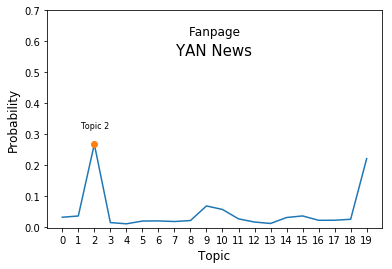

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-YAN News
.png


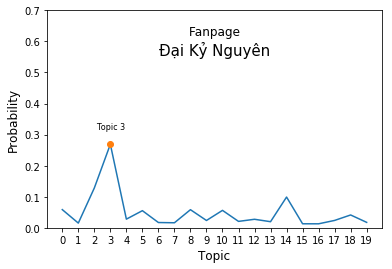

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/8-Đại Kỷ Nguyên
.png


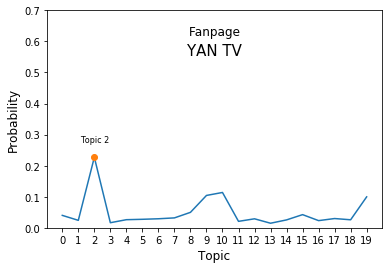

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-YAN TV
.png


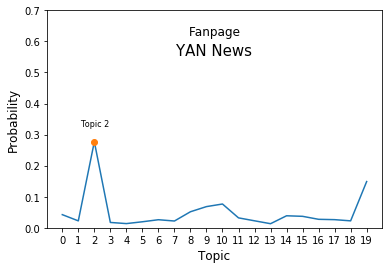

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-YAN News
.png


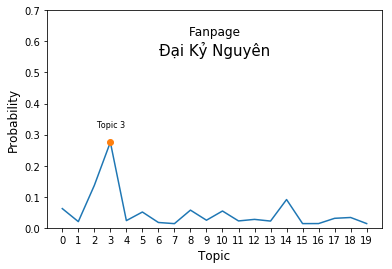

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/8-Đại Kỷ Nguyên
.png


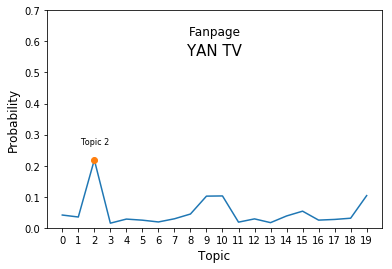

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-YAN TV
.png


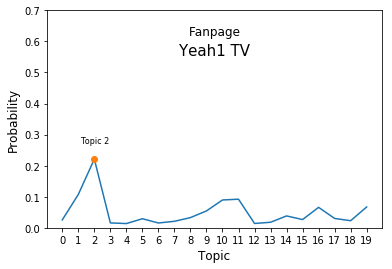

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Yeah1 TV
.png


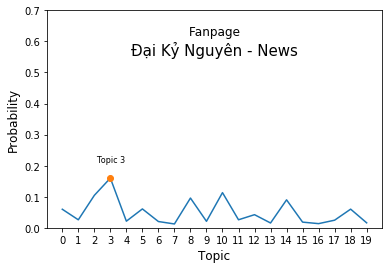

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Đại Kỷ Nguyên - News
.png


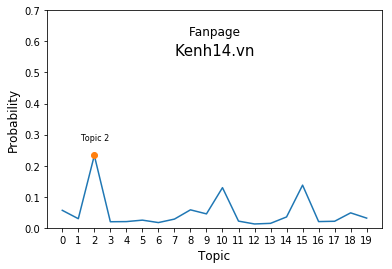

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Kenh14.vn
.png


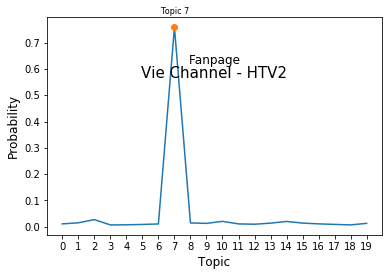

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/9-Vie Channel - HTV2
.png


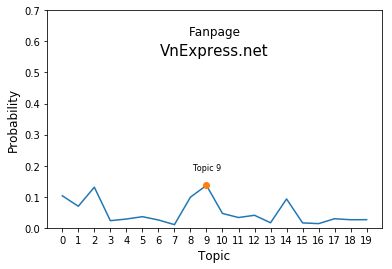

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-VnExpress.net
.png


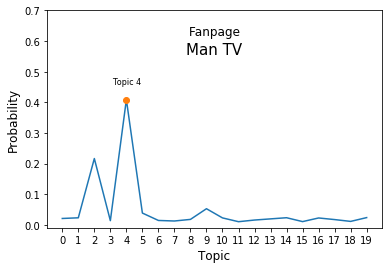

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Man TV
.png


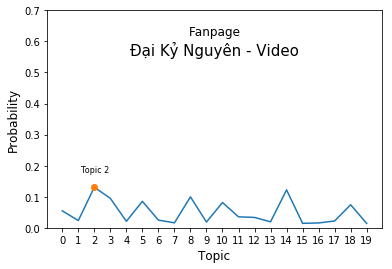

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Đại Kỷ Nguyên - Video
.png


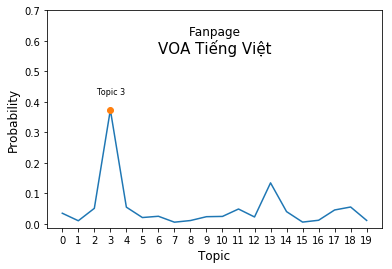

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/8-VOA Tiếng Việt
.png


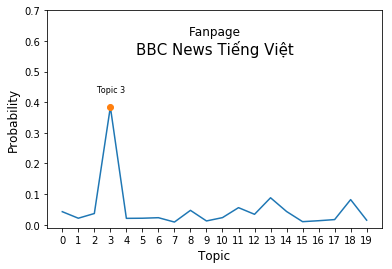

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/8-BBC News Tiếng Việt
.png


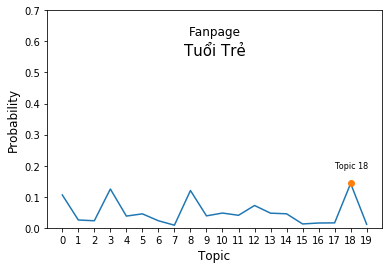

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-Tuổi Trẻ
.png


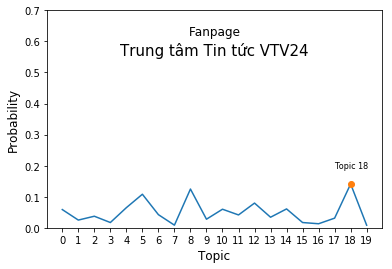

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-Trung tâm Tin tức VTV24
.png


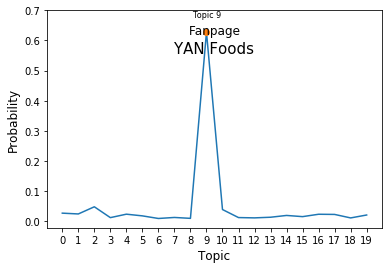

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-YAN Foods
.png


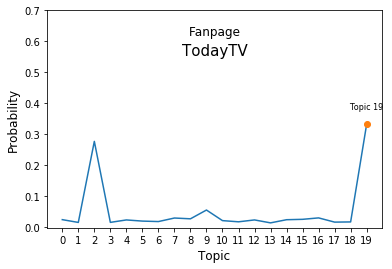

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/5-TodayTV
.png


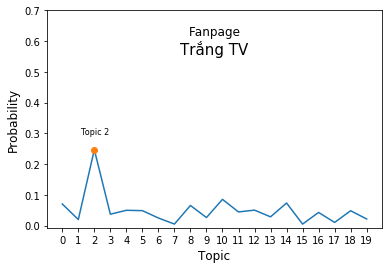

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Trắng TV
.png


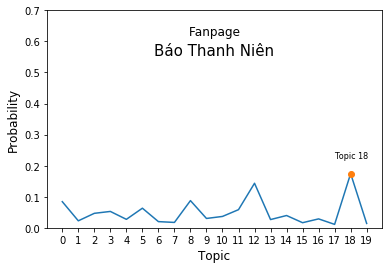

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-Báo Thanh Niên
.png


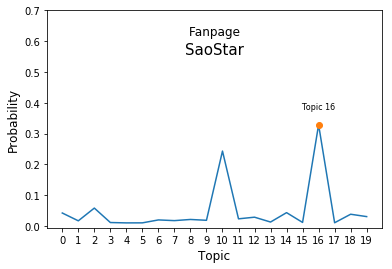

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/3-SaoStar
.png


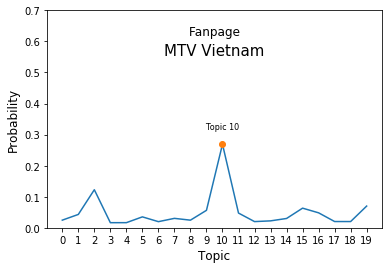

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-MTV Vietnam
.png


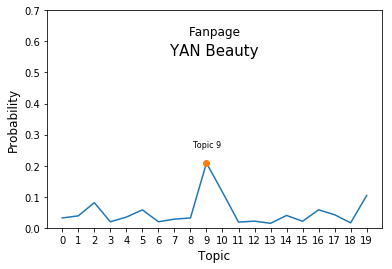

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-YAN Beauty
.png


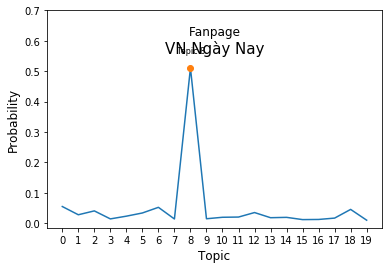

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/0-VN Ngày Nay
.png


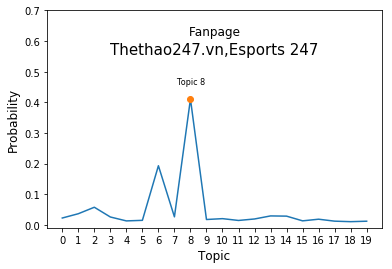

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/0-Thethao247.vn,Esports 247
.png


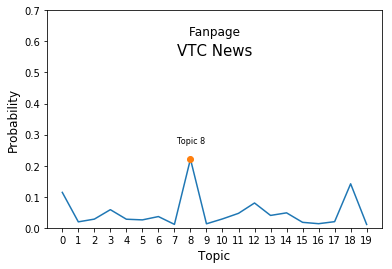

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-VTC News
.png


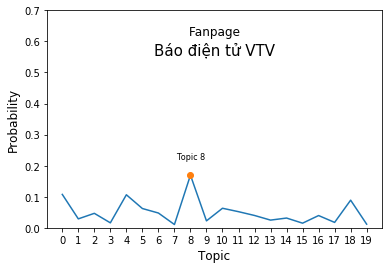

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-Báo điện tử VTV
.png


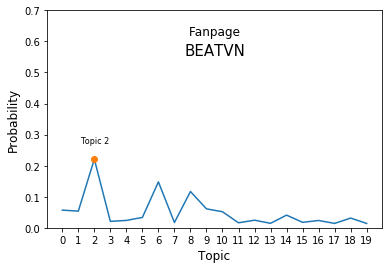

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-BEATVN
.png


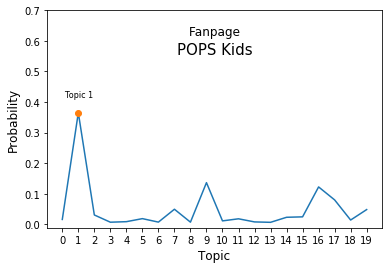

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-POPS Kids
.png


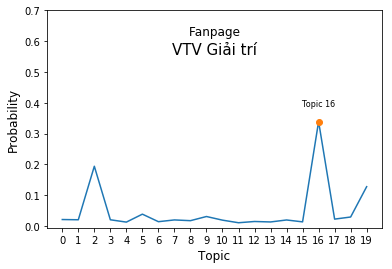

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/3-VTV Giải trí
.png


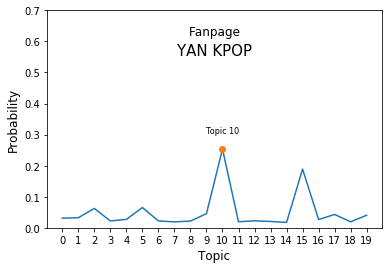

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-YAN KPOP
.png


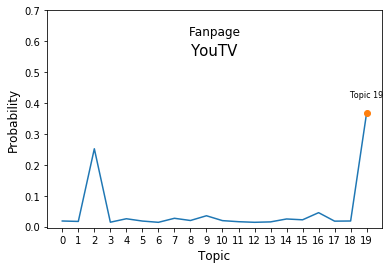

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/5-YouTV
.png


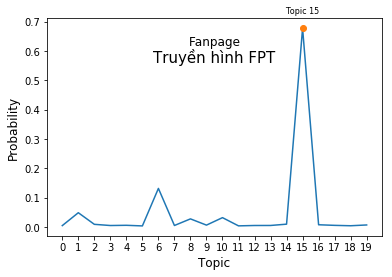

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/7-Truyền hình FPT
.png


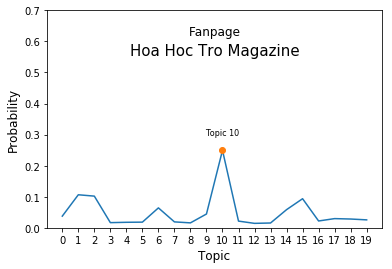

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Hoa Hoc Tro Magazine
.png


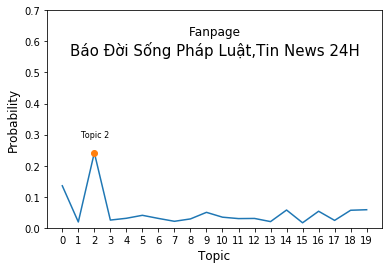

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Báo Đời Sống Pháp Luật,Tin News 24H
.png


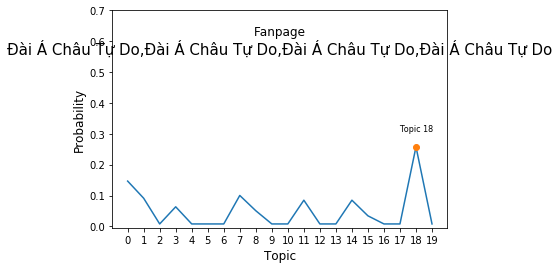

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-Đài Á Châu Tự Do,Đài Á Châu Tự Do,Đài Á Châu Tự Do,Đài Á Châu Tự Do
.png


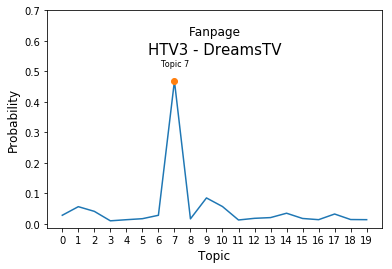

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/9-HTV3 - DreamsTV
.png


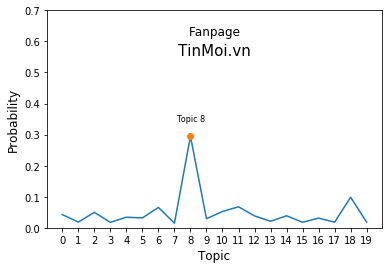

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-TinMoi.vn
.png


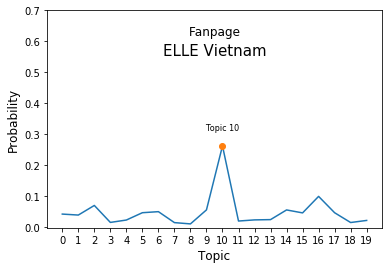

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-ELLE Vietnam
.png


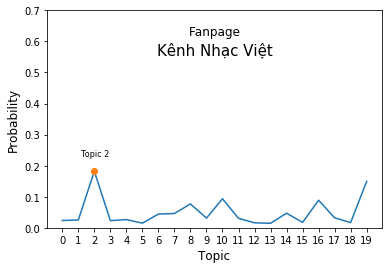

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Kênh Nhạc Việt
.png


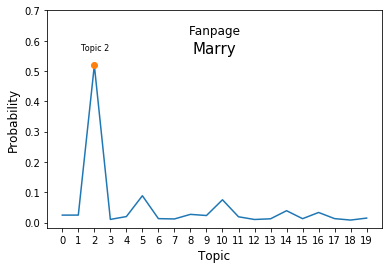

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Marry
.png


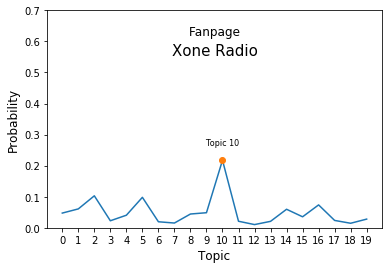

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Xone Radio
.png


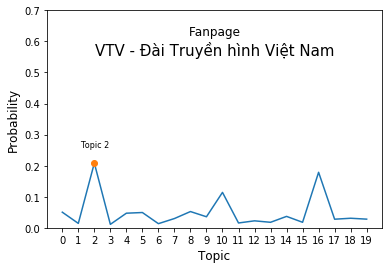

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-VTV - Đài Truyền hình Việt Nam
.png


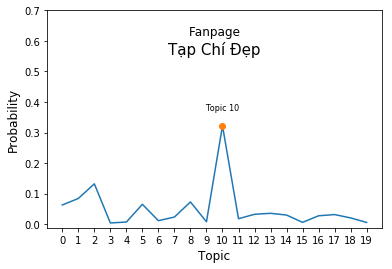

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Tạp Chí Đẹp
.png


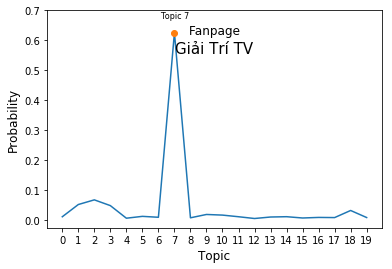

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/9-Giải Trí TV
.png


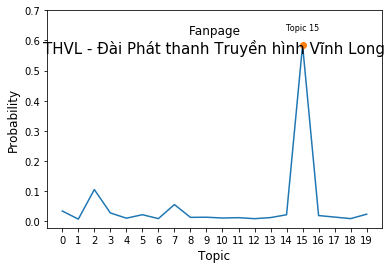

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/7-THVL - Đài Phát thanh Truyền hình Vĩnh Long
.png


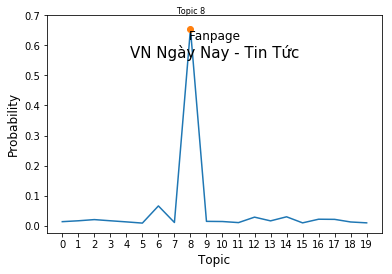

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/0-VN Ngày Nay - Tin Tức
.png


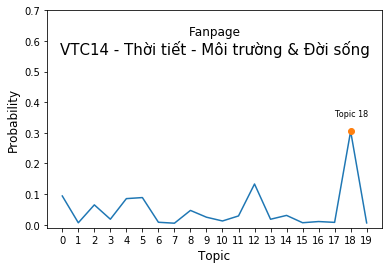

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-VTC14 - Thời tiết - Môi trường & Đời sống
.png


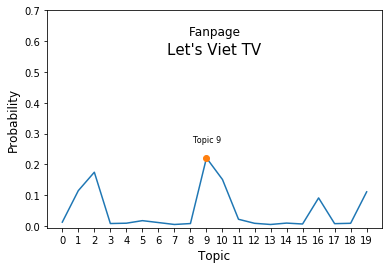

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Let's Viet TV
.png


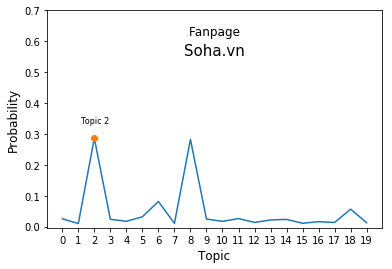

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-Soha.vn
.png


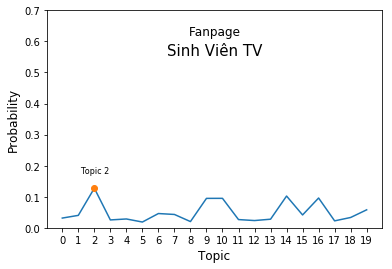

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Sinh Viên TV
.png


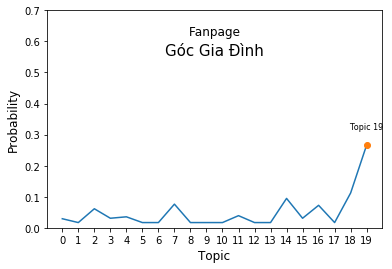

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/5-Góc Gia Đình
.png


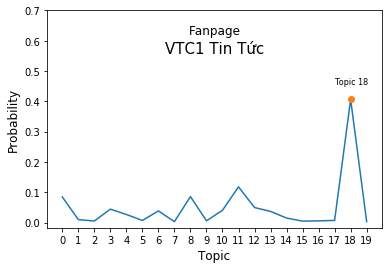

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-VTC1 Tin Tức
.png


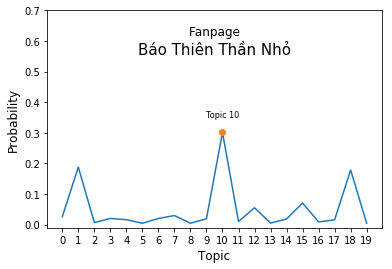

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Báo Thiên Thần Nhỏ
.png


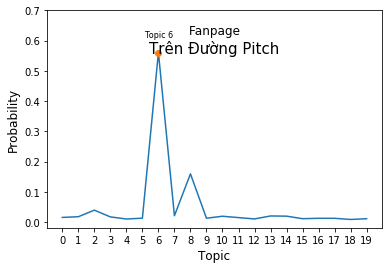

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-Trên Đường Pitch
.png


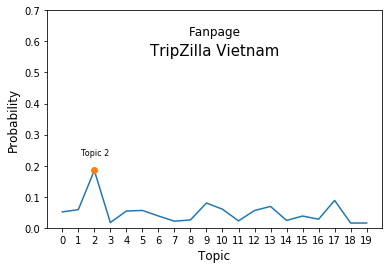

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-TripZilla Vietnam
.png


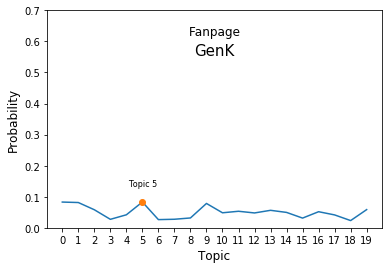

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-GenK
.png


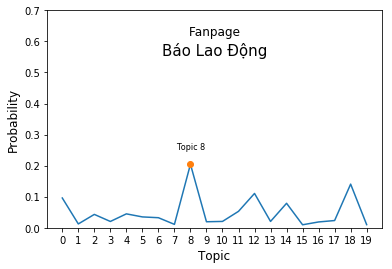

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-Báo Lao Động
.png


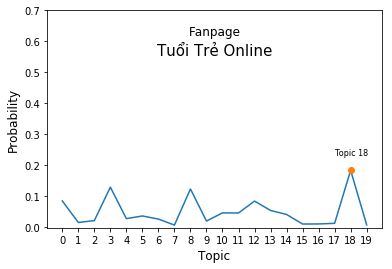

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-Tuổi Trẻ Online
.png


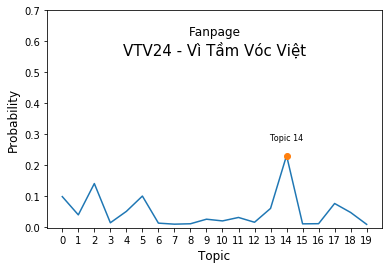

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-VTV24 - Vì Tầm Vóc Việt
.png


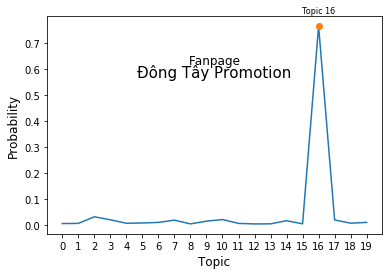

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/3-Đông Tây Promotion
.png


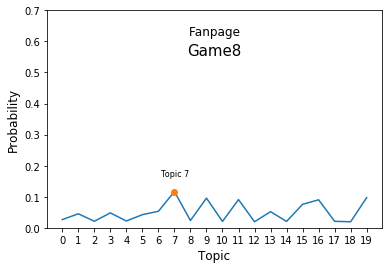

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Game8
.png


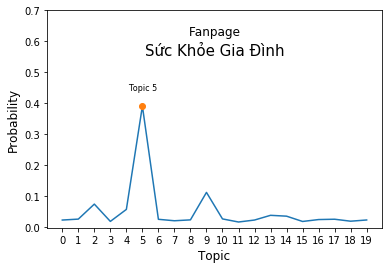

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Sức Khỏe Gia Đình
.png


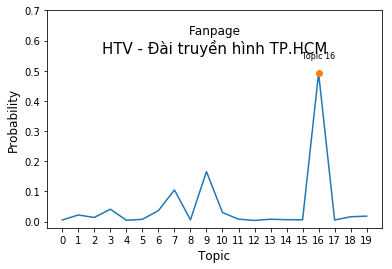

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/3-HTV - Đài truyền hình TP.HCM
.png


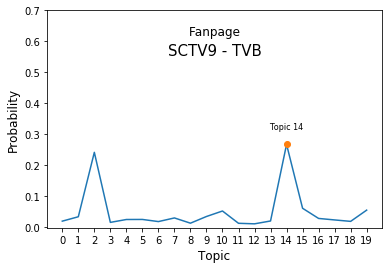

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-SCTV9 - TVB
.png


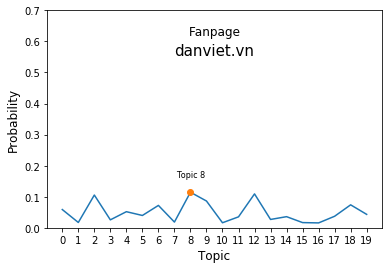

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-danviet.vn
.png


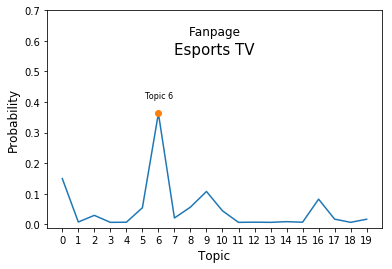

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-Esports TV
.png


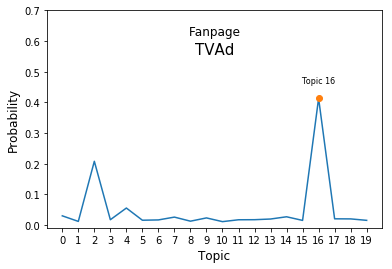

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/3-TVAd
.png


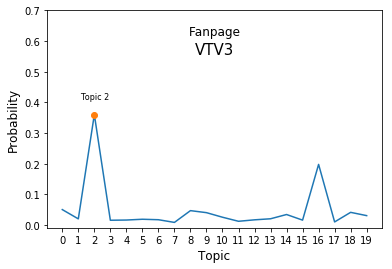

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-VTV3
.png


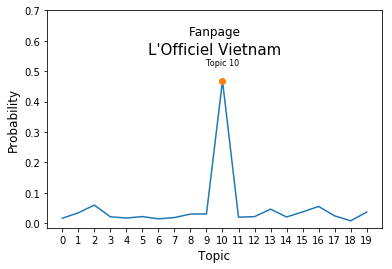

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-L'Officiel Vietnam
.png


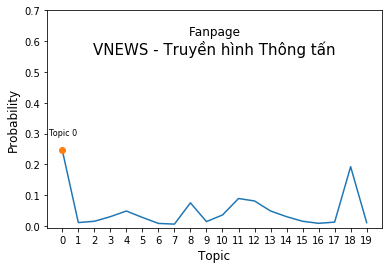

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-VNEWS - Truyền hình Thông tấn
.png


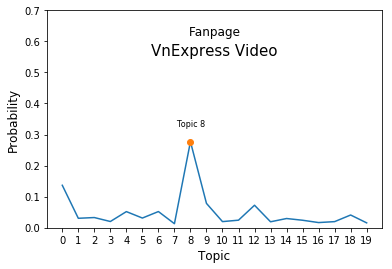

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-VnExpress Video
.png


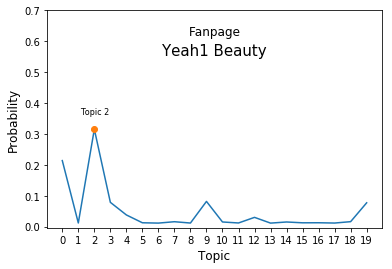

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Yeah1 Beauty
.png


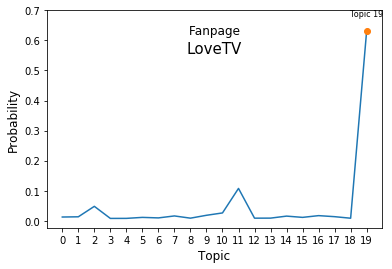

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/5-LoveTV
.png


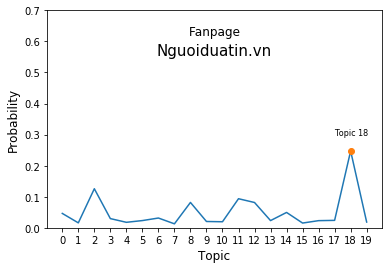

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-Nguoiduatin.vn
.png


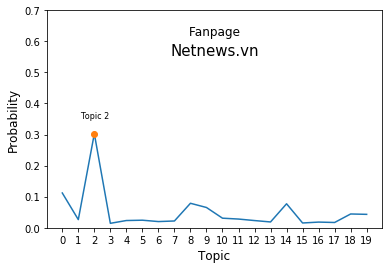

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Netnews.vn
.png


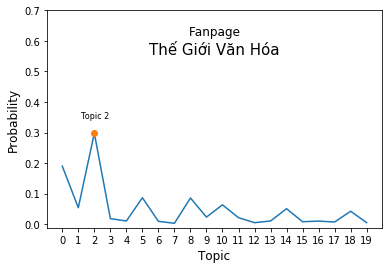

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Thế Giới Văn Hóa
.png


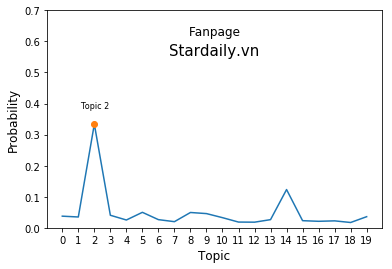

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Stardaily.vn
.png


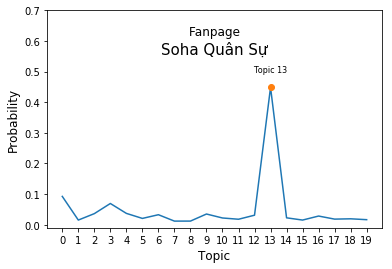

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/8-Soha Quân Sự
.png


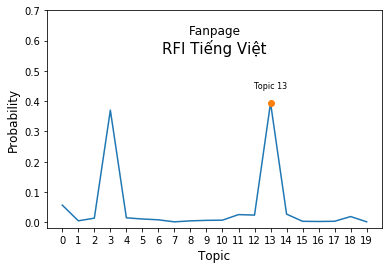

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/8-RFI Tiếng Việt
.png


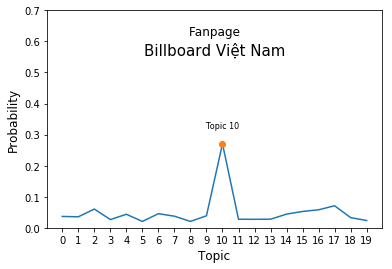

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Billboard Việt Nam
.png


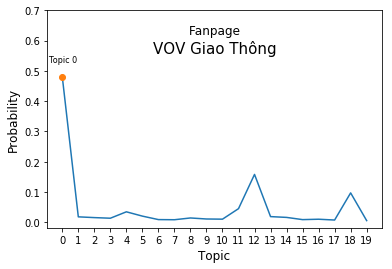

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-VOV Giao Thông
.png


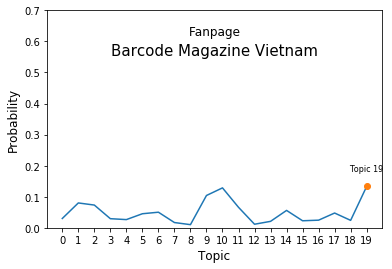

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Barcode Magazine Vietnam
.png


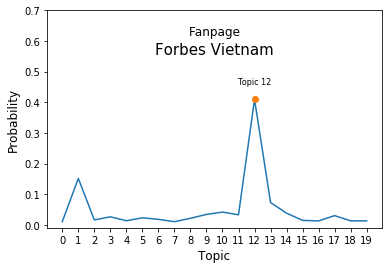

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-Forbes Vietnam
.png


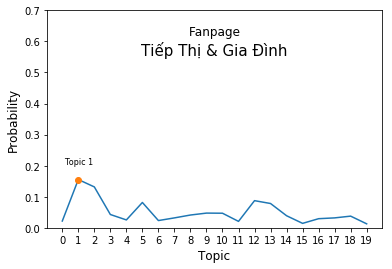

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Tiếp Thị & Gia Đình
.png


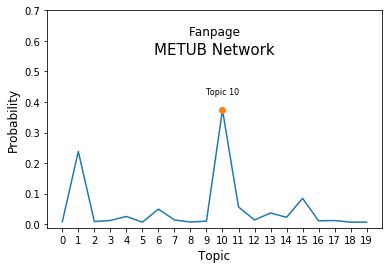

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-METUB Network
.png


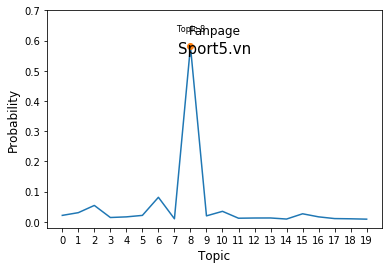

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/0-Sport5.vn
.png


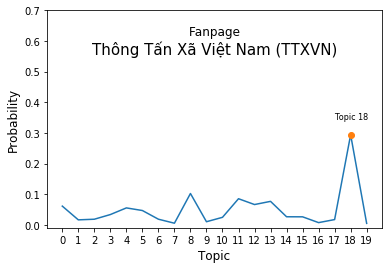

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-Thông Tấn Xã Việt Nam (TTXVN)
.png


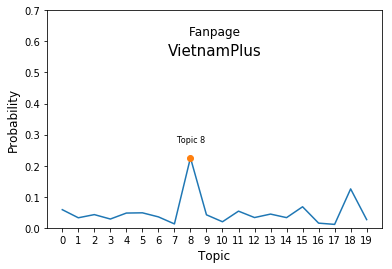

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-VietnamPlus
.png


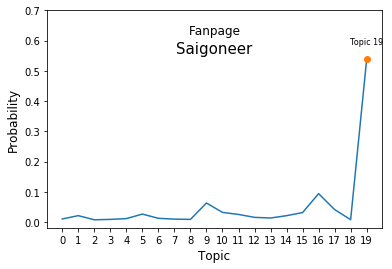

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/5-Saigoneer
.png


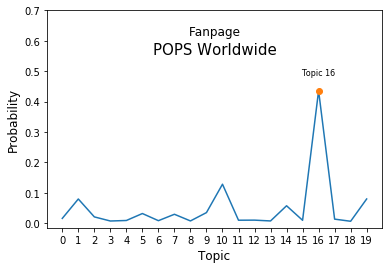

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/3-POPS Worldwide
.png


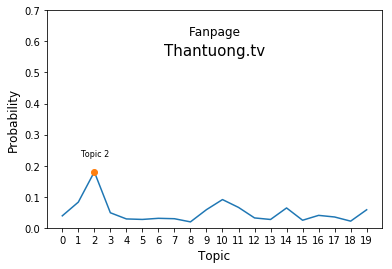

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Thantuong.tv
.png


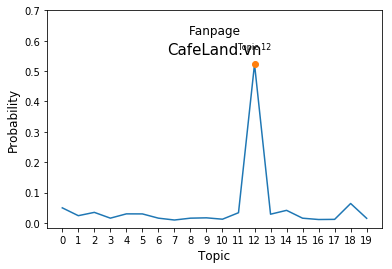

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-CafeLand.vn
.png


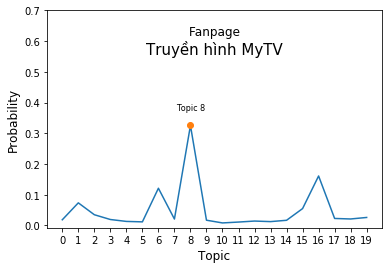

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-Truyền hình MyTV
.png


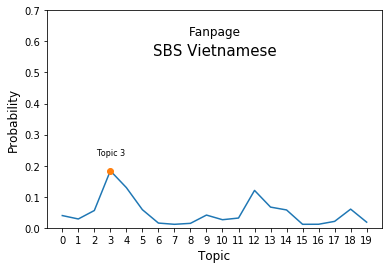

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/8-SBS Vietnamese
.png


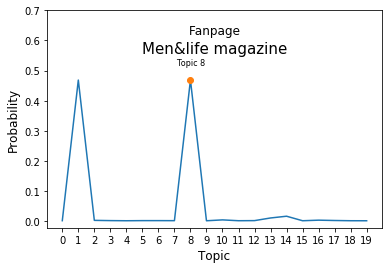

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/0-Men&life magazine
.png


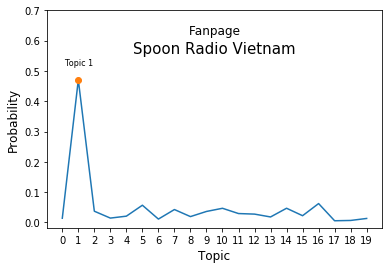

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Spoon Radio Vietnam
.png


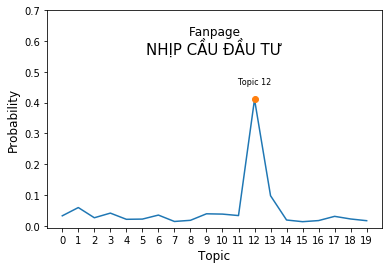

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-NHỊP CẦU ĐẦU TƯ
.png


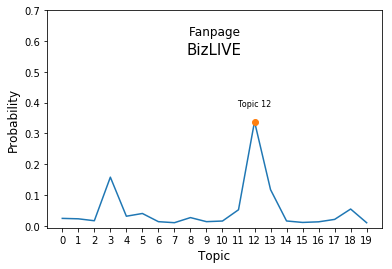

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-BizLIVE
.png


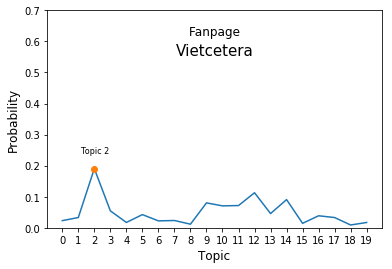

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-Vietcetera
.png


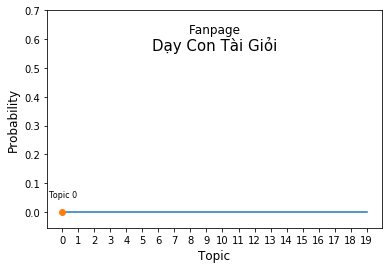

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Dạy Con Tài Giỏi
.png


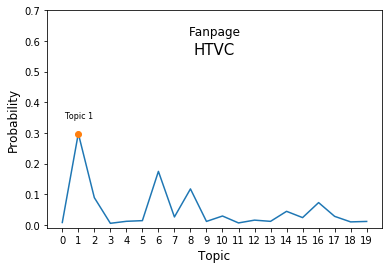

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-HTVC
.png


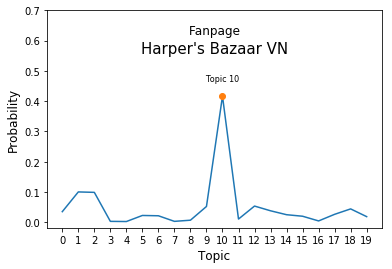

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-Harper's Bazaar VN
.png


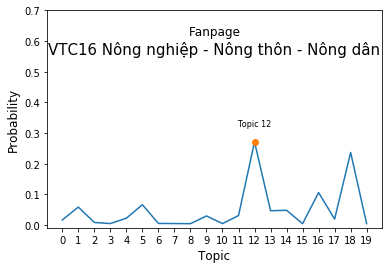

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/4-VTC16 Nông nghiệp - Nông thôn - Nông dân
.png


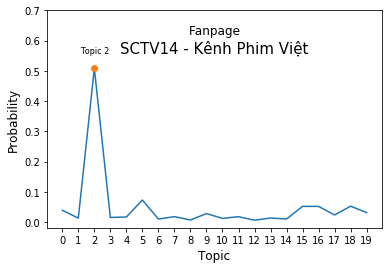

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/1-SCTV14 - Kênh Phim Việt
.png


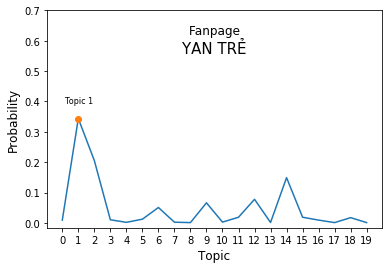

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/2-YAN TRẺ
.png


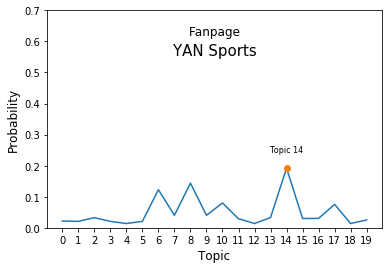

/home/vietphan/Downloads/fbcrawl/Data-Media-Nov/model/fig/6-YAN Sports
.png


In [11]:
import matplotlib.pyplot as plt 
num = 4
set_t = []


for i,page in enumerate(set_page):
    plt.figure()
    plt.plot(page.page_vector)
    plt.xlabel('Topic',fontsize=12)
    plt.ylabel('Probability',fontsize=12)
    plt.text(9.5, 0.62,  "Fanpage", fontsize=12,horizontalalignment='center')
    plt.text(9.5, 0.5,  page.name, fontsize=15,horizontalalignment='center')
    plt.plot(np.argmax(page.page_vector),np.max(page.page_vector), 'o')
    plt.text(np.argmax(page.page_vector),np.max(page.page_vector) + 0.05,  "Topic " + str(np.argmax(page.page_vector)), fontsize=8,horizontalalignment='center')
    plt.xticks(np.arange(0, 20, 1.0))
    plt.yticks(np.arange(0, 0.8, 0.1))
#     plt.title(page.name)
    plt.savefig(root+"fig/"+str(pred_label[i])+"-"+page.name+".png")
    plt.show()
    print(root+"fig/"+str(pred_label[i])+"-"+page.name+".png")
    plt.close()

In [ ]:
n_top_words = 10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    
    

In [ ]:
print(topic_word[0])

In [ ]:
print(np.array(topic_word[0])[np.argsort(topic_word[0])][:-(n_top_words+1):-1])

In [ ]:
vocab[3159]

In [ ]:
n_top_words = 10
import matplotlib.pyplot as plt 
plt.rc('xtick', labelsize=10)
for i, topic_dist in enumerate(topic_word):
    plt.figure()
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    probability = np.array(topic_dist)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print(probability)
    y_pos = np.arange(len(probability))
    plt.bar(y_pos, probability, alpha=0.5)
    plt.xticks(np.arange(0, 10, 1.0),words,rotation=60)
#     plt.yticks(np.arange(0, 0.2, 0.05))
    plt.ylabel('Probability')
    plt.title('Topic '+str(i)+" of "+dataname)
    plt.savefig(root+"fig/Topic "+str(i)+".png")
    plt.show()
    plt.close()


In [12]:
np.max(topic_word[0]),np.argmax(topic_word[0])

(0.030713236702637127, 45105)

In [ ]:
###################### CREATE HEATMAP FROM COREALTION MATRIX ######################

In [13]:
from pandas import DataFrame


In [14]:
dict_ = {}
A = []
B = []
i=0
for page in set_page:
    if(page.name!='Tuấn Hưng\n'):
        A.append(page.name)
        B.append(page.page_vector)
    i+=1
    if(i==10):
        break
for a, b in zip(A, B):
    dict_[a] = b

In [15]:
print(dict_)

{'Đại Kỷ Nguyên - News\n': array([0.0597076 , 0.02576235, 0.10444351, 0.15996103, 0.02128985,
       0.06075675, 0.02017427, 0.01235403, 0.0957581 , 0.02086244,
       0.11319458, 0.02584888, 0.04221813, 0.01546107, 0.09000099,
       0.01828503, 0.01340778, 0.02449107, 0.06004221, 0.01598032]), 'Kenh14.vn\n': array([0.056234  , 0.02929464, 0.23290833, 0.01949311, 0.01994996,
       0.02466326, 0.01682577, 0.02799998, 0.05781474, 0.0448112 ,
       0.12926089, 0.02149333, 0.01232874, 0.01432104, 0.03495993,
       0.13732504, 0.02000013, 0.0210228 , 0.04811351, 0.0311796 ]), 'YAN TV\n': array([0.04108692, 0.0347292 , 0.21866715, 0.01490835, 0.02805891,
       0.02455319, 0.01881386, 0.02902765, 0.04433586, 0.10192612,
       0.1025693 , 0.01820293, 0.02871243, 0.01661363, 0.03809671,
       0.05351951, 0.02473407, 0.02691925, 0.03086529, 0.10365969]), 'Đại Kỷ Nguyên\n': array([0.06182472, 0.01993059, 0.1365384 , 0.2755591 , 0.02315542,
       0.05082437, 0.01708826, 0.01342218, 0.05690

In [16]:
df = DataFrame(dict_)

In [17]:
corrMatrix = df.corr()


In [18]:
corrMatrix


,Kenh14.vn,Vie Channel - HTV2,YAN News,YAN TV,Yeah1 TV,Đại Kỷ Nguyên,Đại Kỷ Nguyên - News
Kenh14.vn\n,1.000000,-0.070879,0.769700,0.835059,0.707279,0.218578,0.371889
Vie Channel - HTV2\n,-0.070879,1.000000,-0.086170,-0.078107,-0.115788,-0.136483,-0.201391
YAN News\n,0.769700,-0.086170,1.000000,0.954538,0.821803,0.218842,0.258410
YAN TV\n,0.835059,-0.078107,0.954538,1.000000,0.804778,0.170154,0.262485
Yeah1 TV\n,0.707279,-0.115788,0.821803,0.804778,1.000000,0.151753,0.207200
Đại Kỷ Nguyên\n,0.218578,-0.136483,0.218842,0.170154,0.151753,1.000000,0.862447
Đại Kỷ Nguyên - News\n,0.371889,-0.201391,0.258410,0.262485,0.207200,0.862447,1.000000


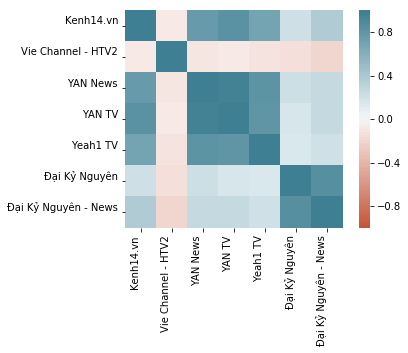

In [19]:
import seaborn as sns

ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


In [ ]:
###################### CREATE WORDS CLOUD FOR EACH TOPICS ######################

In [30]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


In [31]:
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10')

In [32]:
n_top_words = 20
topic_dist = topic_word[18] #CHANE THE NUMBER OF TOPIC HERE
words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
probability = np.array(topic_dist)[np.argsort(topic_dist)][:-(n_top_words+1):-1]

In [33]:
item = []
for a,b in zip(words,probability):
    item.append((a,b))
# cloud.fit_words(item)
print(dict(item))

{'thông_tin': 0.009055451532650517, 'bắt': 0.005835221663284508, 'vụ': 0.016844554550005903, 'án': 0.00869764821383207, 'điều_tra': 0.010294001482406674, 'công_an': 0.019624411103903058, 'gia_đình': 0.010954561455609958, 'thi_thể': 0.007211388274124682, 'tp': 0.007486621596292717, 'tội': 0.006936154951956648, 'nạn_nhân': 0.016376657902320246, 'đối_tượng': 0.005780174998850901, 'phát_hiện': 0.006110454985452543, 'xét_xử': 0.006137978317669346, 'hành_vi': 0.006688444962005416, 'tỉnh': 0.016376657902320246, 'cảnh_sát': 0.009495824848119372, 'cơ_quan': 0.006220548314319757, 'vụ_việc': 0.005917791659934919, 'việt_nam': 0.005890268327718115}


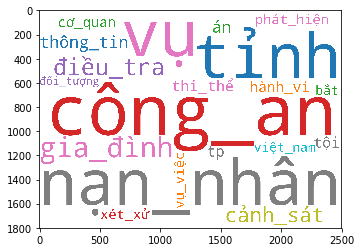

In [34]:
plt.imshow(cloud.fit_words(dict(item)))